## Ejercicio Regresión Lineal

Predecir el precio de una casa basado en su tamaño (en metros cuadrados). 

Pasos a seguir:

1. Generar datos sintéticos: Crear un conjunto de datos con diferentes tamaños de casas y sus respectivos precios.
2. Dividir los datos en entrenamiento y prueba.
3. Entrenar un modelo de regresión lineal usando LinearRegression de sklearn.
4. Realizar predicciones con el modelo entrenado.
5. Visualizar los resultados con una gráfica de dispersión y la recta de regresión.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 1️⃣ Generar datos sintéticos

In [16]:

np.random.seed(42)  # Fijar la semilla para reproducibilidad
X = 50 + 250 * np.random.rand(100, 1)  # Tamaño de casas en metros cuadrados (entre 50 y 300)
y = 50000 + 300 * X + np.random.randn(100, 1) * 10000  # Precio de la casa con ruido

### 2️⃣ Dividir los datos en entrenamiento y prueba (80% - 20%)

In [17]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

### 3️⃣ Inicializar y entrenar el modelo de regresión lineal

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 4️⃣ Realizar predicciones

In [19]:
y_pred = model.predict(X_test)

### 5️⃣ Evaluar el modelo

In [20]:
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Pendiente (w1): {model.coef_[0][0]:.2f}, Intercepto (w0): {model.intercept_[0]:.2f}")

Error cuadrático medio (MSE): 65369951.37
Pendiente (w1): 283.95, Intercepto (w0): 52231.84


### 6️⃣ Visualizar los resultados

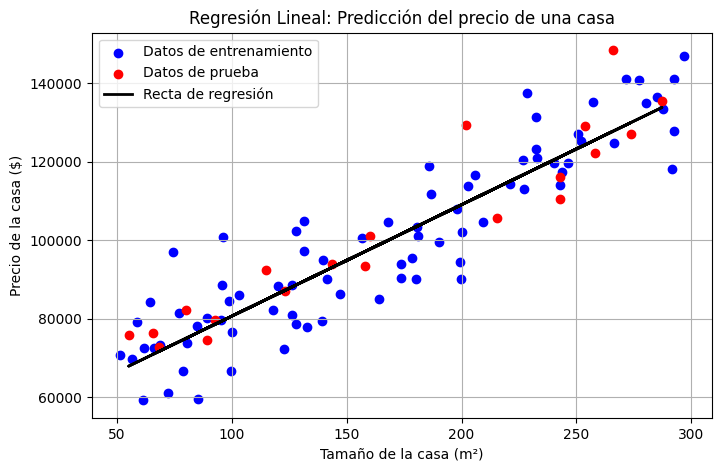

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color="blue", label="Datos de entrenamiento")
plt.scatter(X_test, y_test, color="red", label="Datos de prueba")
plt.plot(X_test, y_pred, color="black", linewidth=2, label="Recta de regresión")
plt.xlabel("Tamaño de la casa (m²)")
plt.ylabel("Precio de la casa ($)")
plt.title("Regresión Lineal: Predicción del precio de una casa")
plt.legend()
plt.grid(True)
plt.show()

### Preguntas

1. ¿Cómo afecta la pendiente 𝑤1 a la predicción del precio?

2. ¿Qué significa el intercepto 𝑤0?

3. ¿Cómo cambia el modelo si aumentamos el ruido en los datos?

4. Añadir más variables: Incluir más características como el número de habitaciones.

## Parte 2

Ejercicio 2: Implementación de Regresión Lineal Usando Solo NumPy (Sin Scikit-Learn)

Objetivo del ejercicio

Implementar la regresión lineal desde cero, sin utilizar sklearn. 

Aplicar las fórmulas de regresión lineal usando álgebra matricial con NumPy.


In [28]:
# Agregar columna de unos a X para el término de sesgo
X2 =np.c_[np.ones((X.shape[0])), X]

In [31]:
# Inicialización de parámetros
w = np.zeros(X2.shape[1])
alpha = 0.00001
epochs = 1000


In [37]:
# Algoritmo de descenso por el gradiente
m = len(y)

for _ in range(epochs):
    gradient = (1/m)*X2.T @ (X2 @ w - y.flatten())
    w = w -alpha*gradient
    #print(w)

print('Pesos aprendidos:', w)

Pesos aprendidos: [175.6886967  545.78261687]


In [38]:
# Realizar predicciones
y_pred = X2 @ w


In [39]:
# Calcular el Error Cuadrático Medio (MSE)
mse = np.mean((y.flatten() - y_pred) ** 2)
print(f"Error cuadrático medio (MSE): {mse:.2f}")


Error cuadrático medio (MSE): 537353851.75


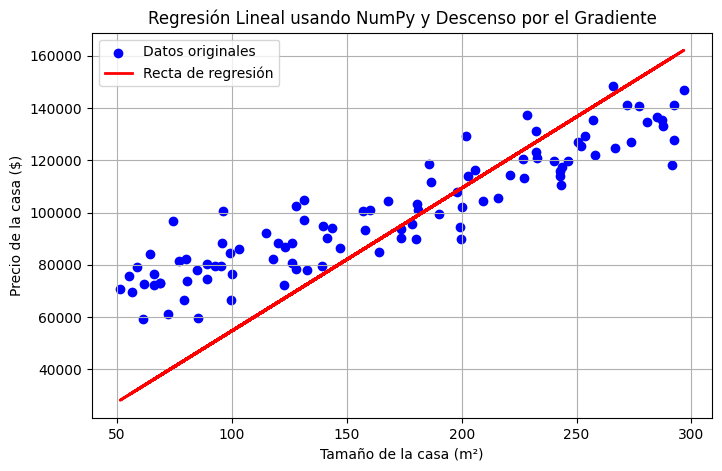

In [43]:
# Visualizar los resultados
plt.figure(figsize=(8, 5))
plt.scatter(X2[:,1], y, color="blue", label="Datos originales")
plt.plot(X2[:,1], y_pred, color="red", linewidth=2, label="Recta de regresión")
plt.xlabel("Tamaño de la casa (m²)")
plt.ylabel("Precio de la casa ($)")
plt.title("Regresión Lineal usando NumPy y Descenso por el Gradiente")
plt.legend()
plt.grid(True)
plt.show()